In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/jn/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('../ASIA_CCS_Data/final_full_website_data_with_features_and_cluster.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   FQDN                                         2118 non-null   object 
 1   Searched_URL                                 2118 non-null   object 
 2   Status Code                                  2118 non-null   int64  
 3   External_unique_URL_List                     2118 non-null   object 
 4   Landing_Page_Size_In_KB                      2118 non-null   float64
 5   Same Landing Domain                          2118 non-null   int64  
 6   Has Bank Related Keywords                    2118 non-null   int64  
 7   Has Crypto Related Keywords                  2118 non-null   int64  
 8   Has Card Related Keywords                    2118 non-null   int64  
 9   Unique_Internal_Page_Link_Cnt                2118 non-null   int64  
 10  

In [8]:
cluster_1 = df.loc[df['K-means Label']==0]
cluster_2 = df.loc[df['K-means Label']==1]
cluster_3 = df.loc[df['K-means Label']==2]

In [9]:
print(len(cluster_1),len(cluster_2), len(cluster_3))

1185 379 554


In [10]:
cluster_2

,FQDN,Searched_URL,Status Code,External_unique_URL_List,Landing_Page_Size_In_KB,Same Landing Domain,Has Bank Related Keywords,Has Crypto Related Keywords,Has Card Related Keywords,Unique_Internal_Page_Link_Cnt,...,Is Self Resolving Name Server,Total_Name_Servers,Is WhoIs Registrar Available,Is SSL Certificate Retrievable,K-means Label,KMedoids Label,Hierarchical Label,DBSCAN Label,GMM Label,IPQS_Flag
15,aboutukraine.org,https://www.aboutukraine.org,200,[],1.06,1,0,0,0,1,...,0,0,0,1,1,1,1,1,1,1
22,actions-fondations-ukraine.org,https://www.actions-fondations-ukraine.org,200,[],2.77,0,0,0,0,1,...,0,6,1,0,1,1,1,1,1,0
40,aidtoukraine.org,https://www.aidtoukraine.org,-1,[],0.11,1,0,0,0,1,...,0,0,0,0,1,1,1,1,1,1
51,aidukrainefund.org,https://www.aidukrainefund.org,200,[],3.03,1,0,1,0,1,...,0,0,0,1,1,1,1,1,1,0
53,aidukrainetoday.org,https://www.aidukrainetoday.org,200,[],6.60,1,0,0,0,1,...,0,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,workingukraine.com,https://www.workingukraine.com,200,[],1.19,1,0,0,0,1,...,0,6,1,0,1,1,1,1,1,0
2104,xn--ukraine-hilfe-sddeutschland-w3c.de,https://www.xn--ukraine-hilfe-sddeutschland-w3...,200,[],0.83,1,0,0,0,1,...,0,0,0,0,1,1,1,1,1,1
2105,xn--ukraine-hilfe-thringen-7lc.de,https://www.xn--ukraine-hilfe-thringen-7lc.de,200,[],0.83,1,0,0,0,1,...,0,0,0,0,1,1,1,1,1,1
2108,yoga-for-ukraine.com,https://www.yoga-for-ukraine.com,200,[],1.89,1,0,0,0,1,...,0,2,1,0,1,1,1,1,1,1


In [11]:
def dig_cnt(cluster):
  cnt = 0
  for i in cluster['Domain Digit Rate']:
    if i:
      cnt+=1
  return cnt

In [12]:
def theme_cnt(cluster):
  cnt = 0
  a = cluster['Money Keyword Check'].to_list()
  b = cluster['Help Keyword Check'].to_list()
  c = cluster['Campaign Keyword Check'].to_list()
  d = cluster['War Keyword Check'].to_list()
  for i in range(len(a)):
    if a[i] or b[i] or c[i] or d[i]:
      cnt+=1
  return cnt

In [13]:
def hyphen_cnt(cluster):
  cnt = 0
  for i in cluster['Domain Hyphen Count']:
    if i:
      cnt+=1
  return cnt

In [14]:
def for_cnt(cluster):
  cnt = 0
  for i in cluster['For and To Keyword Check']:
    if i:
      cnt+=1
  return cnt

In [15]:
def _4_cnt(cluster):
  cnt = 0
  for i in cluster['Number Instead of Word']:
    if i:
      cnt+=1
  return cnt

In [16]:
print(dig_cnt(cluster_1),100*dig_cnt(cluster_1)/len(cluster_1))
print(dig_cnt(cluster_2),100*dig_cnt(cluster_2)/len(cluster_2))
print(dig_cnt(cluster_3),100*dig_cnt(cluster_3)/len(cluster_3))

109 9.19831223628692
49 12.928759894459104
58 10.469314079422382


In [17]:
print(theme_cnt(cluster_1),100*theme_cnt(cluster_1)/len(cluster_1))
print(theme_cnt(cluster_2),100*theme_cnt(cluster_2)/len(cluster_2))
print(theme_cnt(cluster_3),100*theme_cnt(cluster_3)/len(cluster_3))

345 29.11392405063291
105 27.70448548812665
156 28.15884476534296


In [18]:
print(hyphen_cnt(cluster_1),100*hyphen_cnt(cluster_1)/len(cluster_1))
print(hyphen_cnt(cluster_2),100*hyphen_cnt(cluster_2)/len(cluster_2))
print(hyphen_cnt(cluster_3),100*hyphen_cnt(cluster_3)/len(cluster_3))

251 21.18143459915612
87 22.95514511873351
131 23.646209386281587


In [19]:
print(for_cnt(cluster_1),100*for_cnt(cluster_1)/len(cluster_1))
print(for_cnt(cluster_2),100*for_cnt(cluster_2)/len(cluster_2))
print(for_cnt(cluster_3),100*for_cnt(cluster_3)/len(cluster_3))

201 16.962025316455698
69 18.20580474934037
97 17.509025270758123


In [20]:
print(_4_cnt(cluster_1),100*_4_cnt(cluster_1)/len(cluster_1))
print(_4_cnt(cluster_2),100*_4_cnt(cluster_2)/len(cluster_2))
print(_4_cnt(cluster_3),100*_4_cnt(cluster_3)/len(cluster_3))

84 7.0886075949367084
44 11.609498680738787
46 8.303249097472925


In [22]:
import statistics as st

In [23]:
print(st.mean(cluster_1['Domain Letter Count']))
print(st.stdev(cluster_1['Domain Letter Count']))
print(st.median(cluster_1['Domain Letter Count']))
print(st.mode(cluster_1['Domain Letter Count']))

15.465822784810127
4.268725225758589
15
14


In [24]:
def domain_len_ranges(domain):
  ranges={'_1-14':0,'_15-19':0,'_20-29':0,'>30':0}
  for i in domain:
    if i<15:
      ranges['_1-14']+=1
    elif i>14 and i<20:
      ranges['_15-19']+=1
    elif i>19 and i<30:
      ranges['_20-29']+=1
    else:
      ranges['>30']+=1

  print(ranges,100*(ranges['_15-19']+ranges['_20-29']+ranges['>30'])/len(domain))


In [25]:
domain_len_ranges(cluster_1['Domain Letter Count'])
domain_len_ranges(cluster_2['Domain Letter Count'])
domain_len_ranges(cluster_3['Domain Letter Count'])

{'_1-14': 565, '_15-19': 424, '_20-29': 188, '>30': 8} 52.32067510548523
{'_1-14': 195, '_15-19': 136, '_20-29': 44, '>30': 4} 48.54881266490765
{'_1-14': 251, '_15-19': 222, '_20-29': 79, '>30': 2} 54.69314079422383


In [26]:
print(st.mean(cluster_1['Domain Letter Count']),st.stdev(cluster_1['Domain Letter Count']),st.median(cluster_1['Domain Letter Count']),st.mode(cluster_1['Domain Letter Count']))
print(st.mean(cluster_2['Domain Letter Count']),st.stdev(cluster_2['Domain Letter Count']),st.median(cluster_2['Domain Letter Count']),st.mode(cluster_2['Domain Letter Count']))
print(st.mean(cluster_3['Domain Letter Count']),st.stdev(cluster_3['Domain Letter Count']),st.median(cluster_3['Domain Letter Count']),st.mode(cluster_3['Domain Letter Count']))

15.465822784810127 4.268725225758589 15 14
15.195250659630608 4.077149983415876 14 14
15.371841155234657 4.109135220950223 15.0 14


In [27]:
print(st.mean(cluster_1['Domain Digit Rate']),st.stdev(cluster_1['Domain Digit Rate']),st.median(cluster_1['Domain Digit Rate']),st.mode(cluster_1['Domain Digit Rate']))
print(st.mean(cluster_2['Domain Digit Rate']),st.stdev(cluster_2['Domain Digit Rate']),st.median(cluster_2['Domain Digit Rate']),st.mode(cluster_2['Domain Digit Rate']))
print(st.mean(cluster_3['Domain Digit Rate']),st.stdev(cluster_3['Domain Digit Rate']),st.median(cluster_3['Domain Digit Rate']),st.mode(cluster_3['Domain Digit Rate']))

0.009285232067510548 0.03438876986564974 0.0 0.0
0.010577836411609498 0.031553282970334044 0.0 0.0
0.010259927797833935 0.03665134518393896 0.0 0.0


In [28]:
print(st.mean(cluster_1['Spamhaus TLD Rank']),st.stdev(cluster_1['Spamhaus TLD Rank']),st.median(cluster_1['Spamhaus TLD Rank']),st.mode(cluster_1['Spamhaus TLD Rank']))
print(st.mean(cluster_2['Spamhaus TLD Rank']),st.stdev(cluster_2['Spamhaus TLD Rank']),st.median(cluster_2['Spamhaus TLD Rank']),st.mode(cluster_2['Spamhaus TLD Rank']))
print(st.mean(cluster_3['Spamhaus TLD Rank']),st.stdev(cluster_3['Spamhaus TLD Rank']),st.median(cluster_3['Spamhaus TLD Rank']),st.mode(cluster_3['Spamhaus TLD Rank']))

0.11018565400843883 0.1739416820279757 0.06 0.16
0.13910290237467018 0.21598363025129355 0.13 0.16
0.11691335740072202 0.2148274964686288 0.06 0.16


In [29]:
def within_cluster_analysis_bin_feature(df,cluster_name):
  
  # #for binary column entries
  has_cheap_tld = df['Is Cheapest TLD'].to_list()
  has_cc = df['Is Combined TLD'].to_list()
  xn = df['xn-- Present'].to_list()
  money = df['Money Keyword Check'].to_list()
  help = df['Help Keyword Check'].to_list()
  camp = df['Campaign Keyword Check'].to_list()
  war = df['War Keyword Check'].to_list()
  for_to = df['For and To Keyword Check'].to_list()
  _4_2 = df['Number Instead of Word'].to_list()
  ssl = df['Is SSL Certificate Retrievable'].to_list()
  who = df['Is WhoIs Registrar Available'].to_list()

  column = ['Is Cheapest TLD', 'Is Combined TLD', 'Is xn-- Present','Money Keyword Check','Help Keyword Check',
            'Campaign Keyword Check','War Keyword Check','For and To Keyword Check','Number Instead of Word','Is SSL Certificate Retrievable','Is WhoIs Registrar Available']
  count_val = {
    'Ones': np.array([has_cheap_tld.count(1),has_cc.count(1),xn.count(1),money.count(1),help.count(1),camp.count(1),war.count(1),for_to.count(1),_4_2.count(1),ssl.count(1),who.count(1)]),
    'Zeroes': np.array([has_cheap_tld.count(0),has_cc.count(0),xn.count(0),money.count(0),help.count(0),camp.count(0),war.count(0),for_to.count(0),_4_2.count(0),ssl.count(0),who.count(0)]),
  }
  width = 0.8  # the width of the bars: can also be len(x) sequence


  fig, ax = plt.subplots(figsize=(36, 12))
  bottom = np.zeros(len(column))

  for label, val in count_val.items():
    p = ax.bar(column, val, width, label=label, bottom=bottom)
    bottom += val

    ax.bar_label(p, label_type='center')

  ax.set_title('Analysis for the binary Features for '+ cluster_name)
  ax.legend()

  plt.show()

In [30]:
def within_cluster_analysis_num_feature(df,cluster_name):
  # for numerical column entries
  column = ["Spamhaus TLD Rank", "Domain Letter Count", "Domain Digit Rate", "Domain Hyphen Count"]
  stats = {
    'Mean': np.round((st.mean(df['Spamhaus TLD Rank']), st.mean(df['Domain Letter Count']), st.mean(df['Domain Digit Rate']), st.mean(df["Domain Hyphen Count"])),2),
    'Median': np.round((st.median(df['Spamhaus TLD Rank']), st.median(df['Domain Letter Count']), st.median(df['Domain Digit Rate']), st.median(df["Domain Hyphen Count"])),2),
    'Mode': np.round((st.mode(df['Spamhaus TLD Rank']), st.mode(df['Domain Letter Count']), st.mode(df['Domain Digit Rate']), st.mode(df["Domain Hyphen Count"])),2),
    'STD': np.round((st.stdev(df['Spamhaus TLD Rank']), st.stdev(df['Domain Letter Count']), st.stdev(df['Domain Digit Rate']), st.stdev(df["Domain Hyphen Count"])),2),
    'MAX':np.round((max(df['Spamhaus TLD Rank']), max(df['Domain Letter Count']), max(df['Domain Digit Rate']), max(df["Domain Hyphen Count"])),2),
    'MIN':np.round((min(df['Spamhaus TLD Rank']), min(df['Domain Letter Count']), min(df['Domain Digit Rate']), min(df["Domain Hyphen Count"])),2)
  }

  x = np.arange(len(column))  # the label locations
  width = 0.15  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained',figsize=(20,8))

  for attribute, measurement in stats.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('value')
  ax.set_title('Numerical Feature Analysis of '+ cluster_name)
  ax.set_xticks(x + width, column)
  ax.legend(loc='upper left', ncols=len(column))
  ax.set_ylim(0, 40)
  plt.show()

In [31]:
def within_cluster_analysis_content_bin_feature(df,cluster_name):

  # #for binary column entries
  same_landing_dom = df['Same Landing Domain'].to_list()
  has_bank_text = df['Has Bank Related Keywords'].to_list()
  has_crypto = df['Has Crypto Related Keywords'].to_list()
  has_card = df['Has Card Related Keywords'].to_list()
  has_form = df['Has_Google_Form_External_Link'].to_list()
  has_paypal = df['Has_Paypal_External_Link'].to_list()

  column = ['Same Landing Domain', 'Has Bank Related Keywords', 'Has Crypto Related Keywords','Has Card Related Keywords','Has_Google_Form_External_Link','Has_Paypal_External_Link']
  count_val = {
    'Ones': np.array([same_landing_dom.count(1),has_bank_text.count(1),has_crypto.count(1),has_card.count(1),has_form.count(1),has_paypal.count(1)]),
    'Zeroes': np.array([same_landing_dom.count(0),has_bank_text.count(0),has_crypto.count(0),has_card.count(0),has_form.count(0),has_paypal.count(0)]),
  }

  width = 0.8  # the width of the bars: can also be len(x) sequence

  fig, ax = plt.subplots(figsize=(36, 12))
  bottom = np.zeros(len(column))

  for label, val in count_val.items():
    p = ax.bar(column, val, width, label=label, bottom=bottom)
    bottom += val

    ax.bar_label(p, label_type='center')

  ax.set_title('Analysis for the binary Features for '+ cluster_name)
  ax.legend()
  plt.show()

In [42]:
def within_cluster_analysis_num_content_feature(df,cluster_name,y_lim=700):
  # for numerical column entries
  column = ["Unique_Internal_Page_Link_Cnt", "Unique_External_Page_Link_Cnt", "Avg_External_Links_Len",
            'Stdv_External_Links_Len', 'Ratio_Shortened_URL_And_External_Links', 'Ratio_Social_Media_Links_And_External_Links']
  stats = {
    'Mean': np.round((st.mean(df['Unique_Internal_Page_Link_Cnt']), st.mean(df['Unique_External_Page_Link_Cnt']), st.mean(df["Avg_External_Links_Len"]), st.mean(df["Stdv_External_Links_Len"]), st.mean(df["Ratio_Shortened_URL_And_External_Links"]), st.mean(df["Ratio_Social_Media_Links_And_External_Links"])),2),
    'Median': np.round((st.median(df['Unique_Internal_Page_Link_Cnt']), st.median(df['Unique_External_Page_Link_Cnt']), st.median(df["Avg_External_Links_Len"]), st.median(df["Stdv_External_Links_Len"]), st.median(df["Ratio_Shortened_URL_And_External_Links"]), st.median(df["Ratio_Social_Media_Links_And_External_Links"])),2),
    'Mode': np.round((st.mode(df['Unique_Internal_Page_Link_Cnt']), st.mode(df['Unique_External_Page_Link_Cnt']), st.mode(df["Avg_External_Links_Len"]), st.mode(df["Stdv_External_Links_Len"]), st.mode(df["Ratio_Shortened_URL_And_External_Links"]), st.mode(df["Ratio_Social_Media_Links_And_External_Links"])),2),
    'STD': np.round((st.stdev(df['Unique_Internal_Page_Link_Cnt']), st.stdev(df['Unique_External_Page_Link_Cnt']), st.stdev(df["Avg_External_Links_Len"]), st.stdev(df["Stdv_External_Links_Len"]), st.stdev(df["Ratio_Shortened_URL_And_External_Links"]), st.stdev(df["Ratio_Social_Media_Links_And_External_Links"])),2),
    'MAX':np.round((max(df['Unique_Internal_Page_Link_Cnt']), max(df['Unique_External_Page_Link_Cnt']), max(df["Avg_External_Links_Len"]), max(df["Stdv_External_Links_Len"]), max(df["Ratio_Shortened_URL_And_External_Links"]), max(df["Ratio_Social_Media_Links_And_External_Links"])),2),
    'MIN':np.round((min(df['Unique_Internal_Page_Link_Cnt']), min(df['Unique_External_Page_Link_Cnt']), min(df["Avg_External_Links_Len"]), min(df["Stdv_External_Links_Len"]), min(df["Ratio_Shortened_URL_And_External_Links"]), min(df["Ratio_Social_Media_Links_And_External_Links"])),2),
  }

  x = np.arange(len(column))  # the label locations
  width = 0.15  # the width of the bars
  multiplier = 0
 

  fig, ax = plt.subplots(figsize=(20,8),layout='constrained')

  for attribute, measurement in stats.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('value')
  ax.set_title('Numerical Feature Analysis of '+ cluster_name)
  ax.set_xticks(x + width, column)
  ax.legend(loc='upper left', ncols=len(column))
  ax.set_ylim(0, y_lim)
  plt.show()

In [41]:
def within_cluster_analysis_num_content2_feature(df,cluster_name,y_lim=5000):
  # for numerical column entries
  column = ["Landing_Page_Size_In_KB"]
  stats = {
    'Mean': np.round((st.mean(df['Landing_Page_Size_In_KB'])),2),
    'Median': np.round((st.median(df['Landing_Page_Size_In_KB'])),2),
    'Mode': np.round((st.mode(df['Landing_Page_Size_In_KB'])),2),
    'STD': np.round((st.stdev(df['Landing_Page_Size_In_KB'])),2),
    'MAX':np.round((max(df['Landing_Page_Size_In_KB'])),2),
    'MIN':np.round((min(df['Landing_Page_Size_In_KB'])),2),
  }

  x = np.arange(len(column))  # the label locations
  width = 0.15  # the width of the bars
  multiplier = 0
 

  fig, ax = plt.subplots(figsize=(20,8),layout='constrained')

  for attribute, measurement in stats.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('value')
  ax.set_title('Numerical Feature Analysis of '+ cluster_name)
  ax.set_xticks(x + width, column)
  ax.legend(loc='upper left', ncols=len(column))
  ax.set_ylim(0, y_lim)
  plt.show()

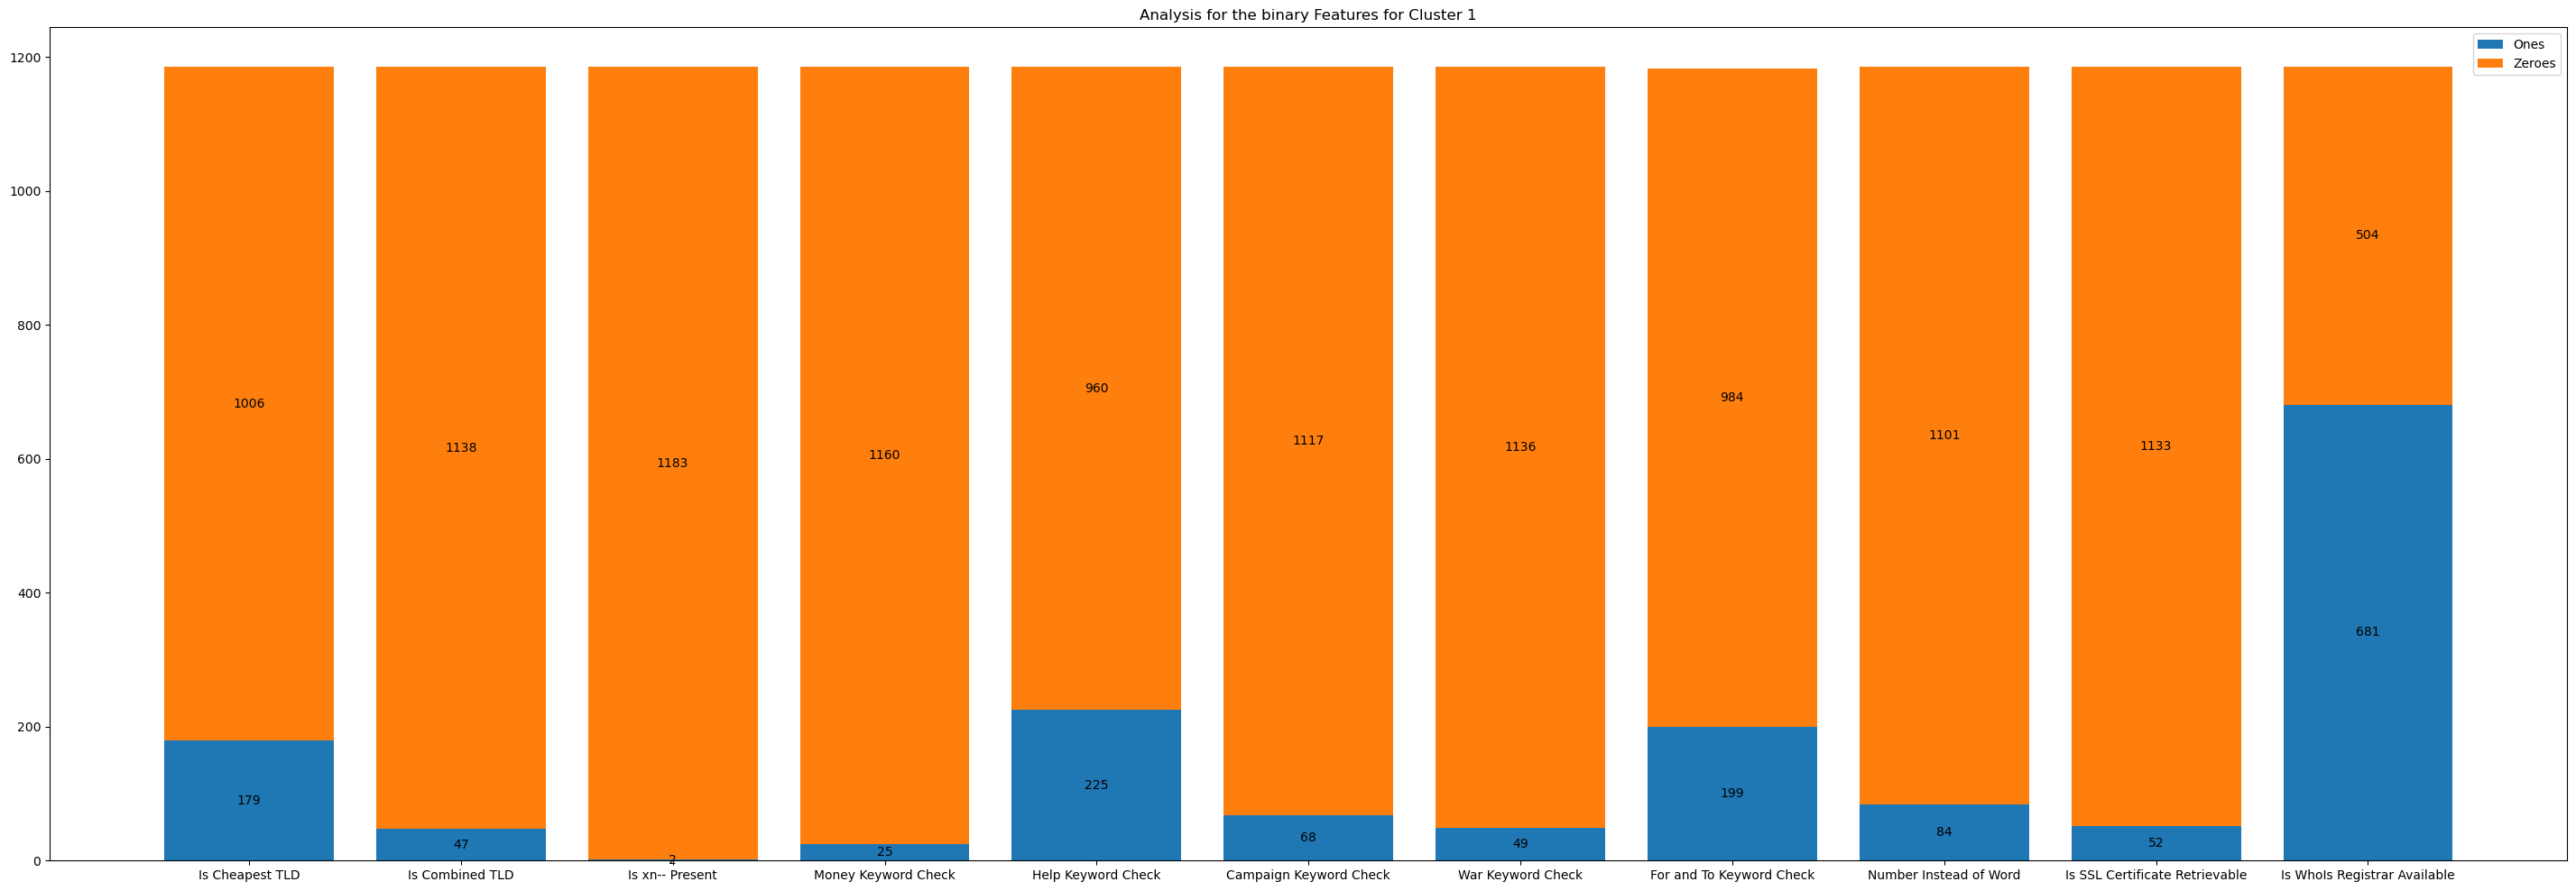

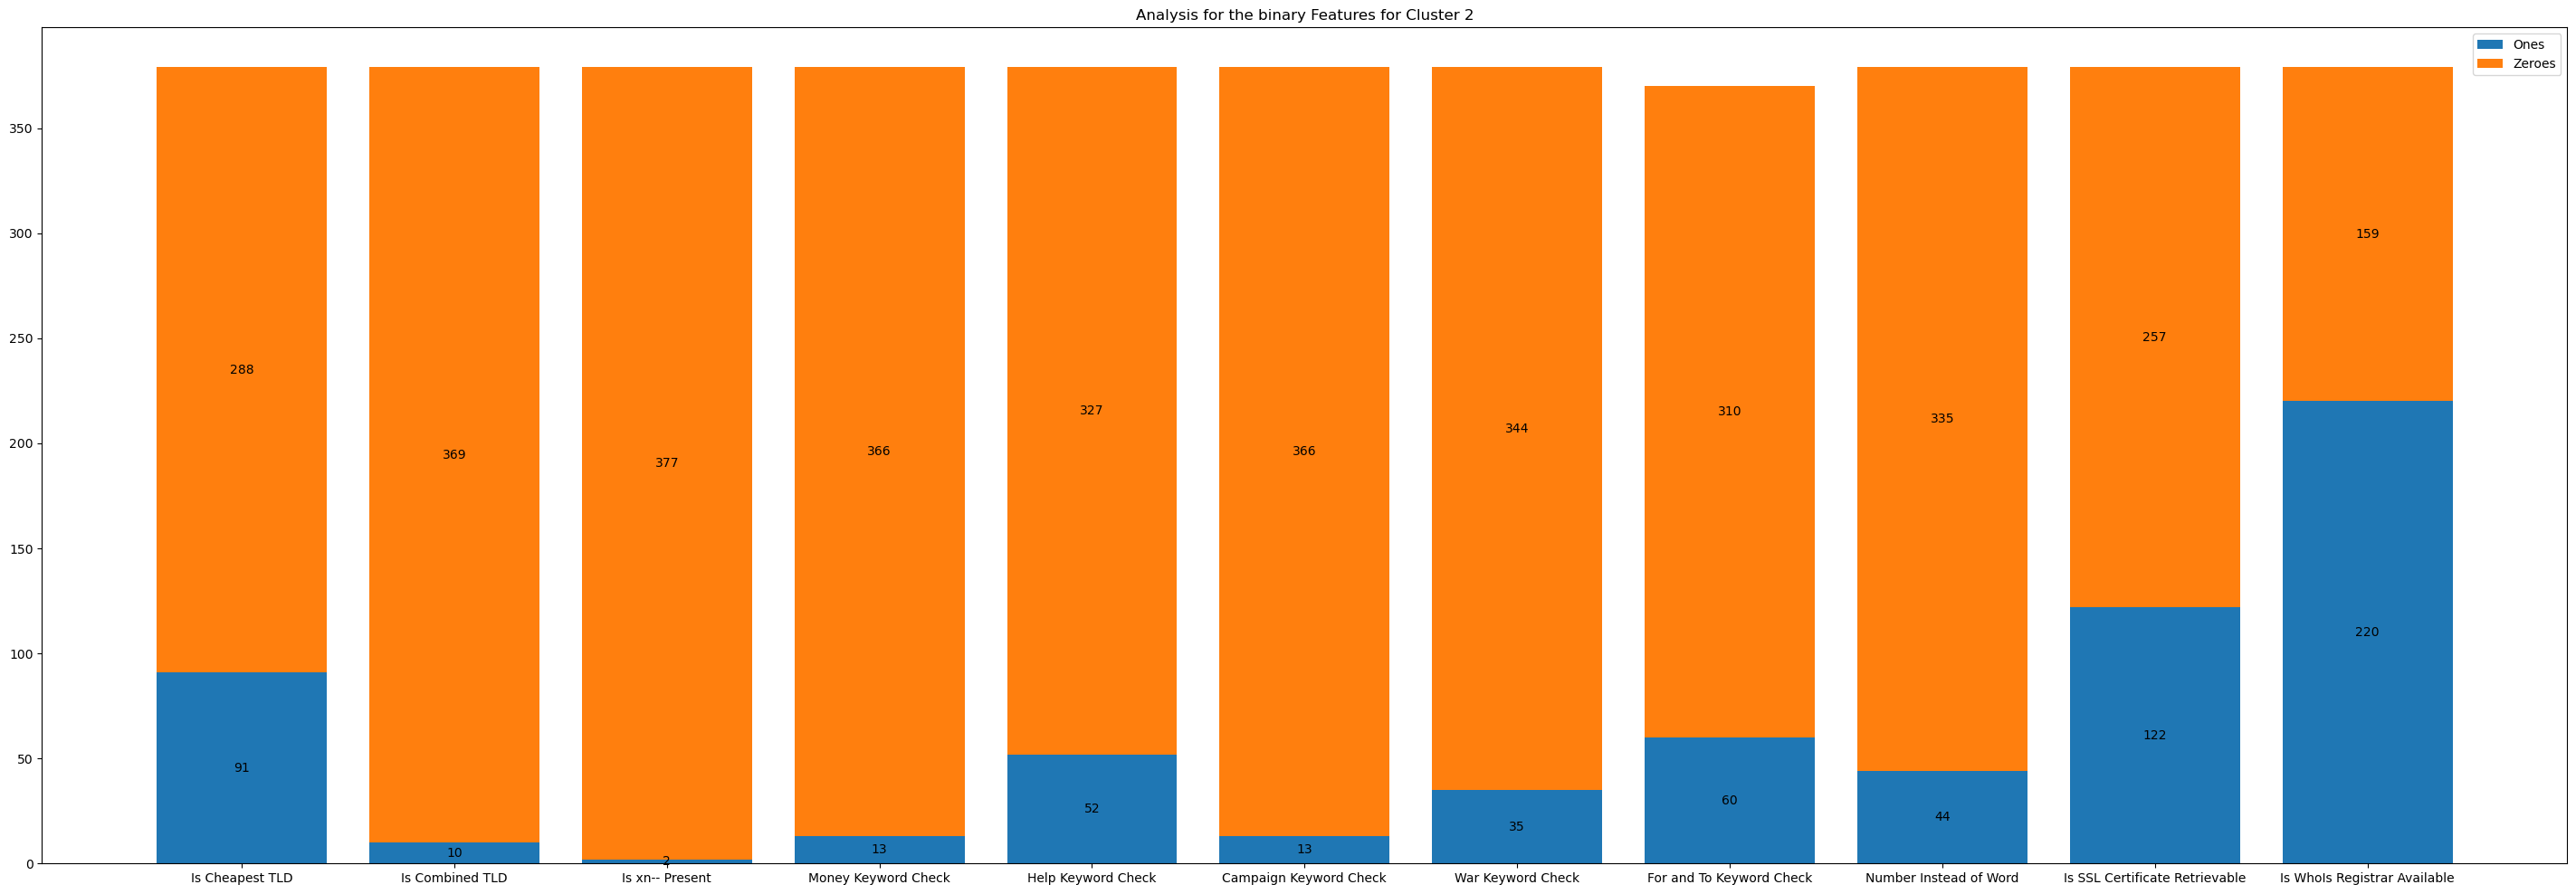

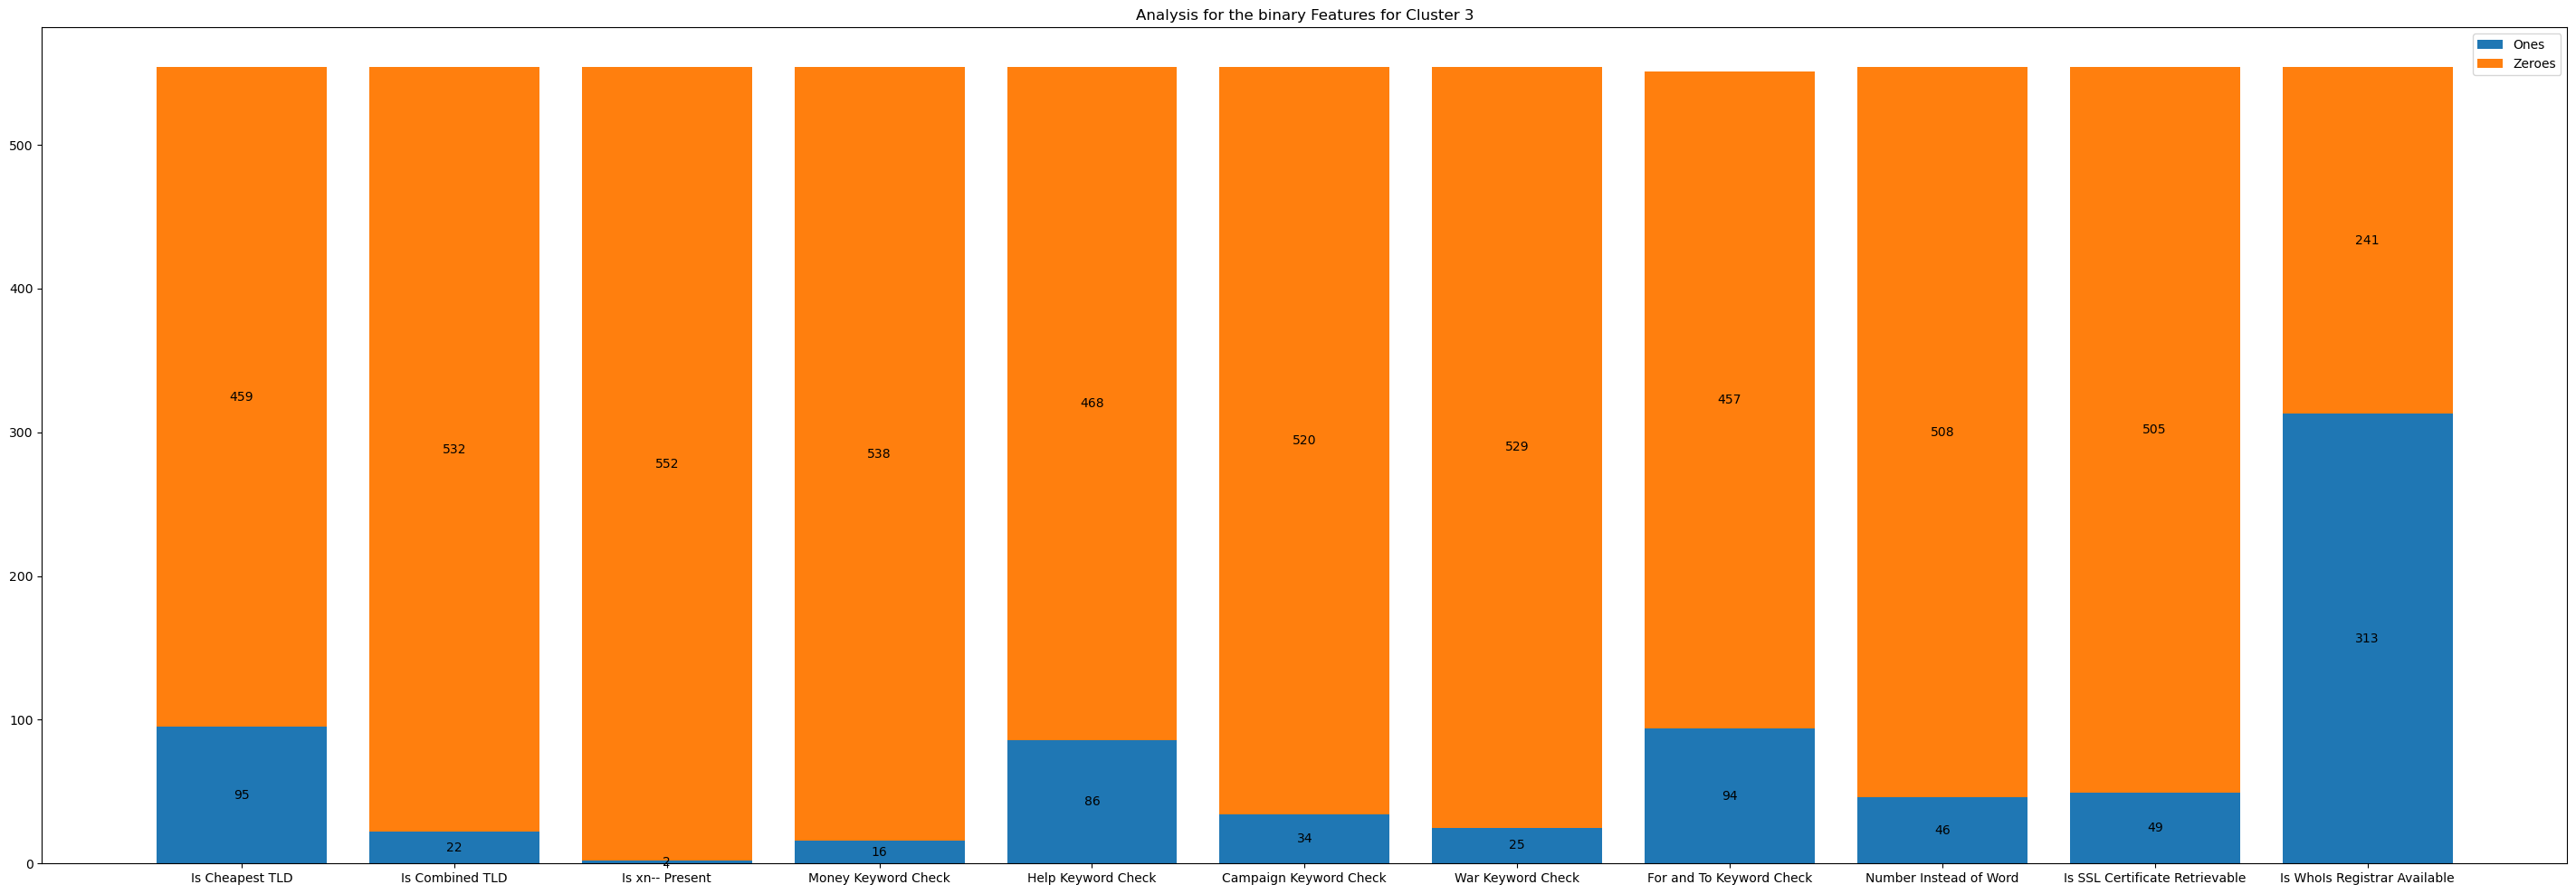

In [43]:
within_cluster_analysis_bin_feature(cluster_1,'Cluster 1')
within_cluster_analysis_bin_feature(cluster_2,'Cluster 2')
within_cluster_analysis_bin_feature(cluster_3,'Cluster 3')

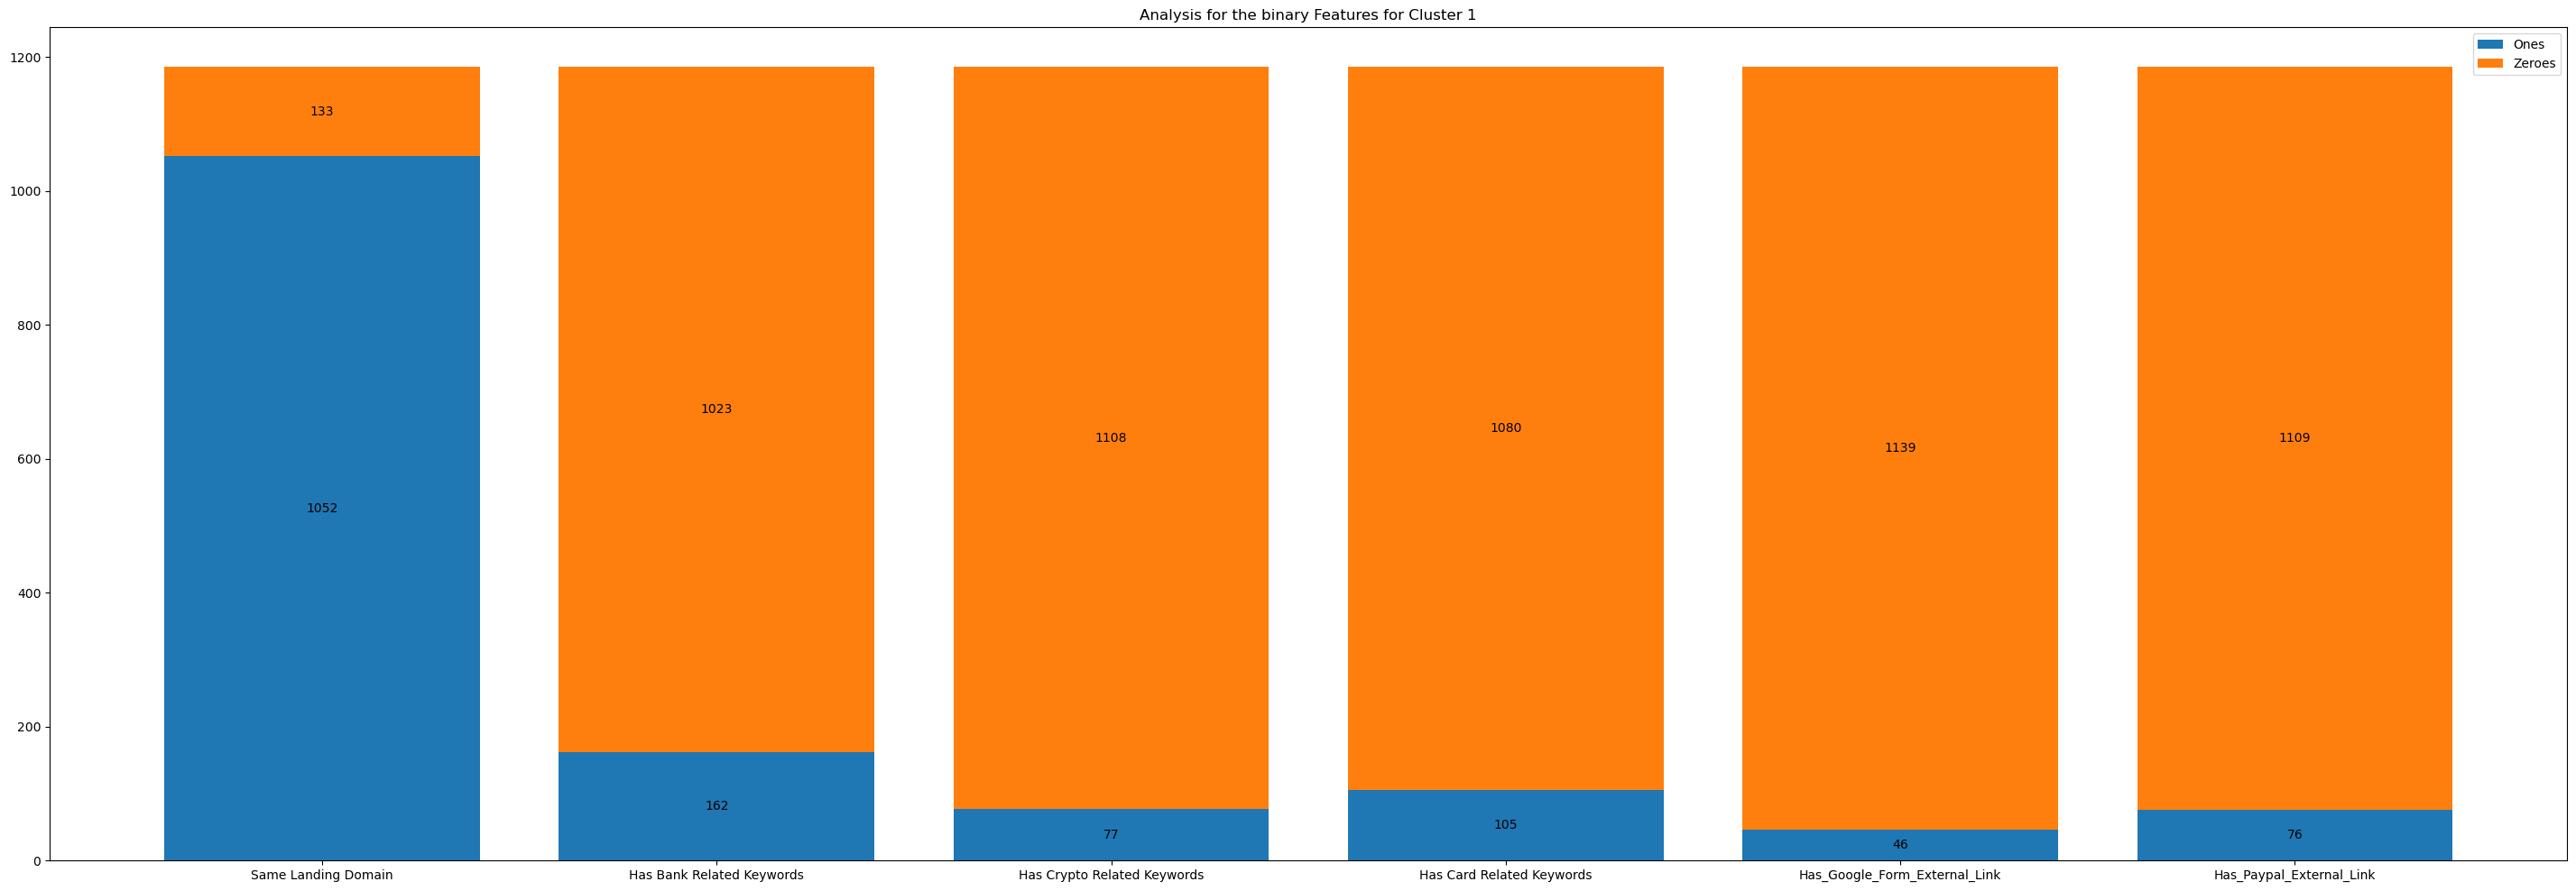

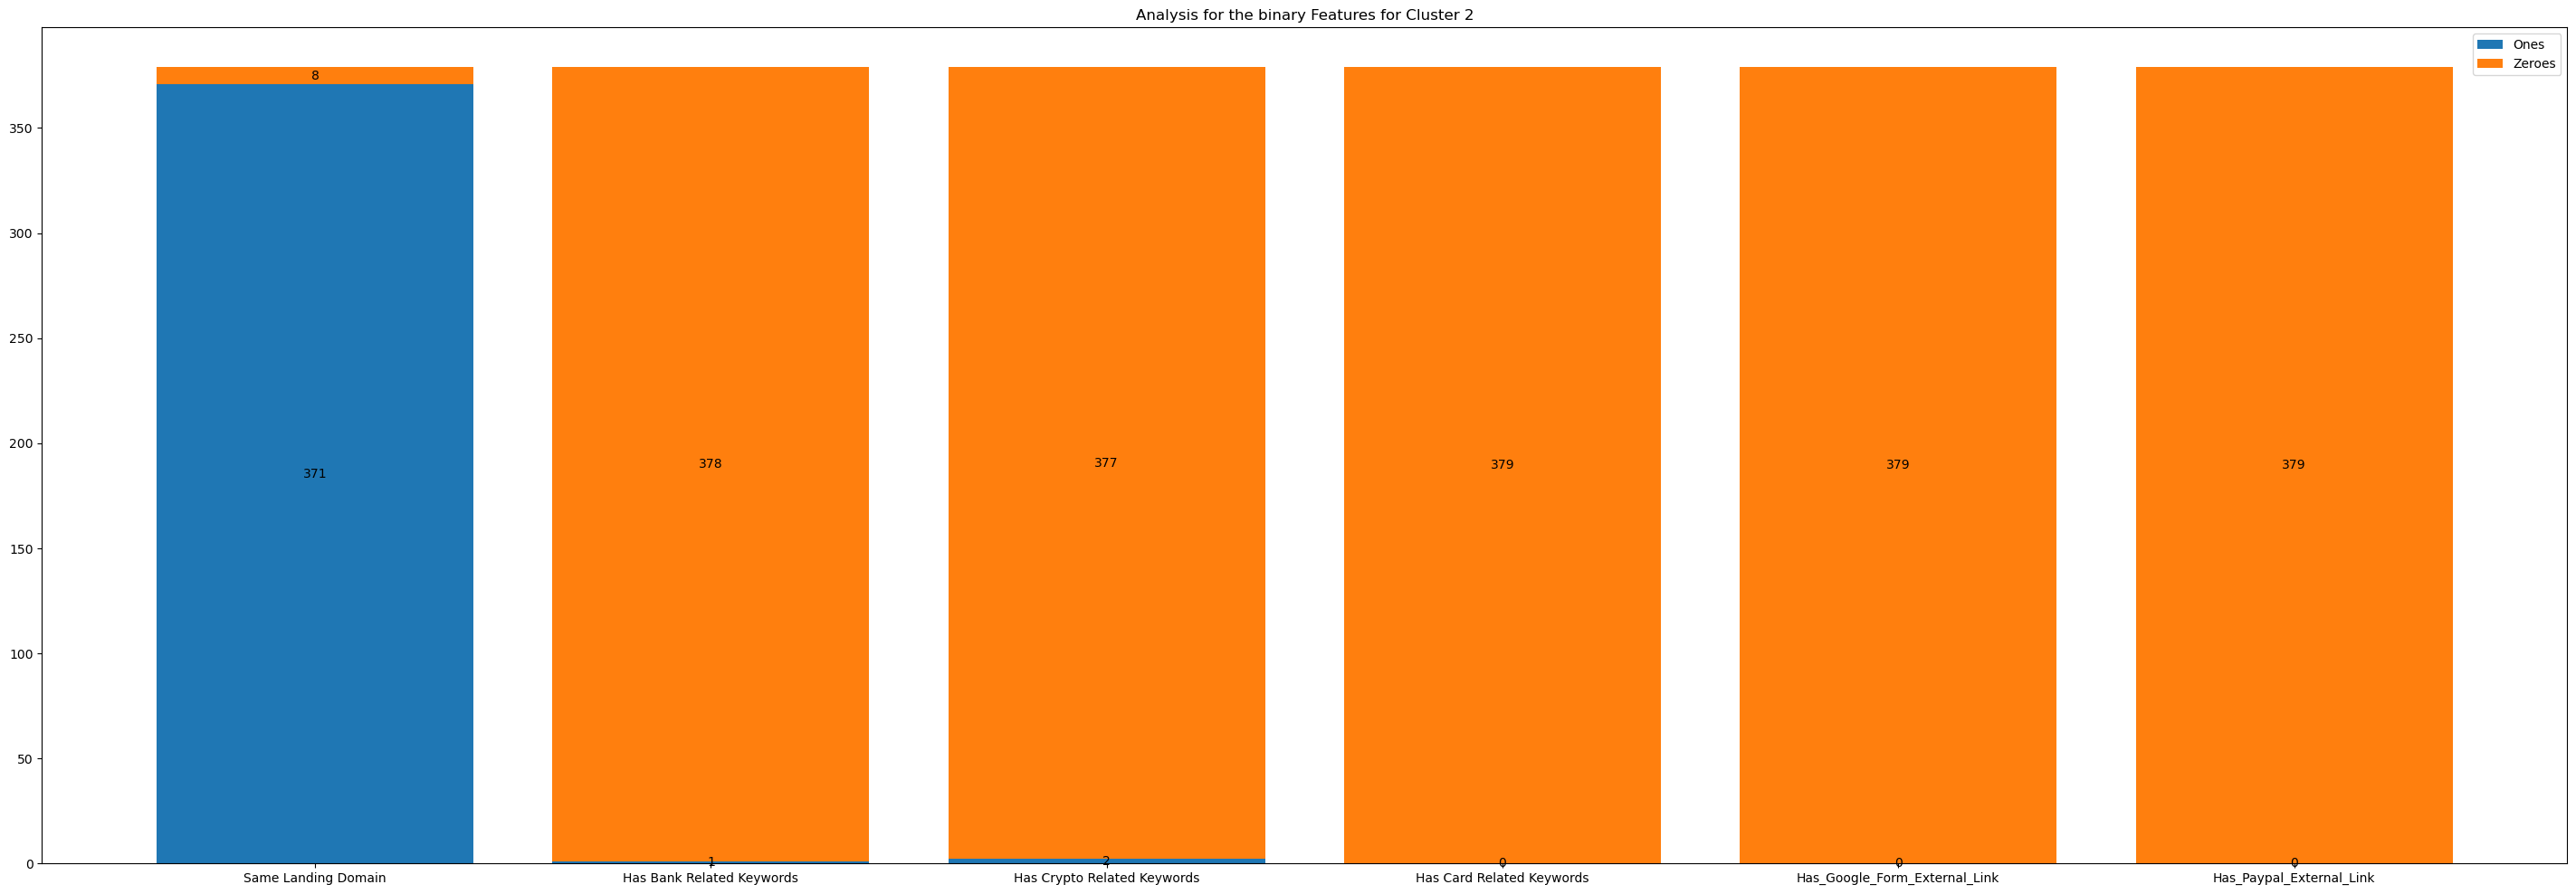

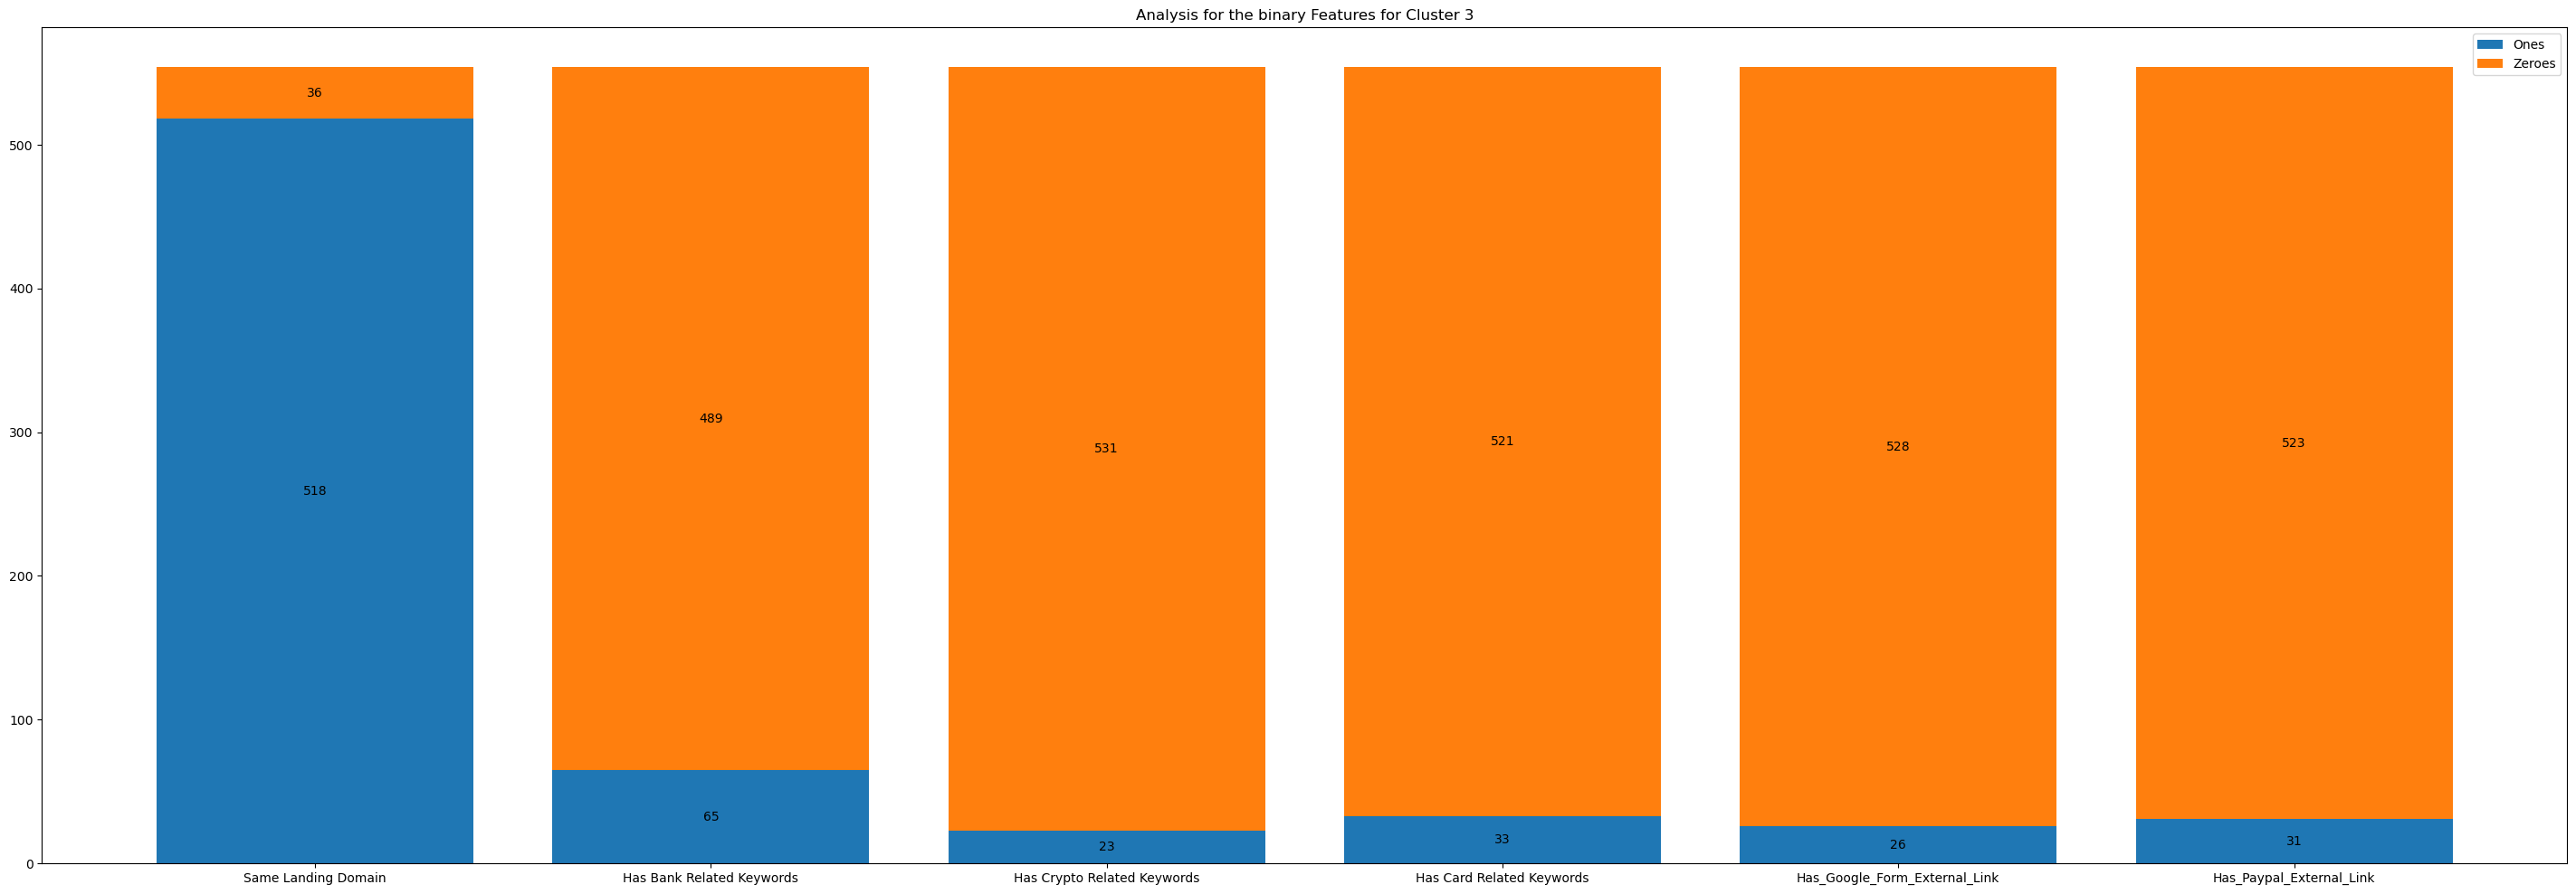

In [44]:
within_cluster_analysis_content_bin_feature(cluster_1,'Cluster 1')
within_cluster_analysis_content_bin_feature(cluster_2,'Cluster 2')
within_cluster_analysis_content_bin_feature(cluster_3,'Cluster 3')

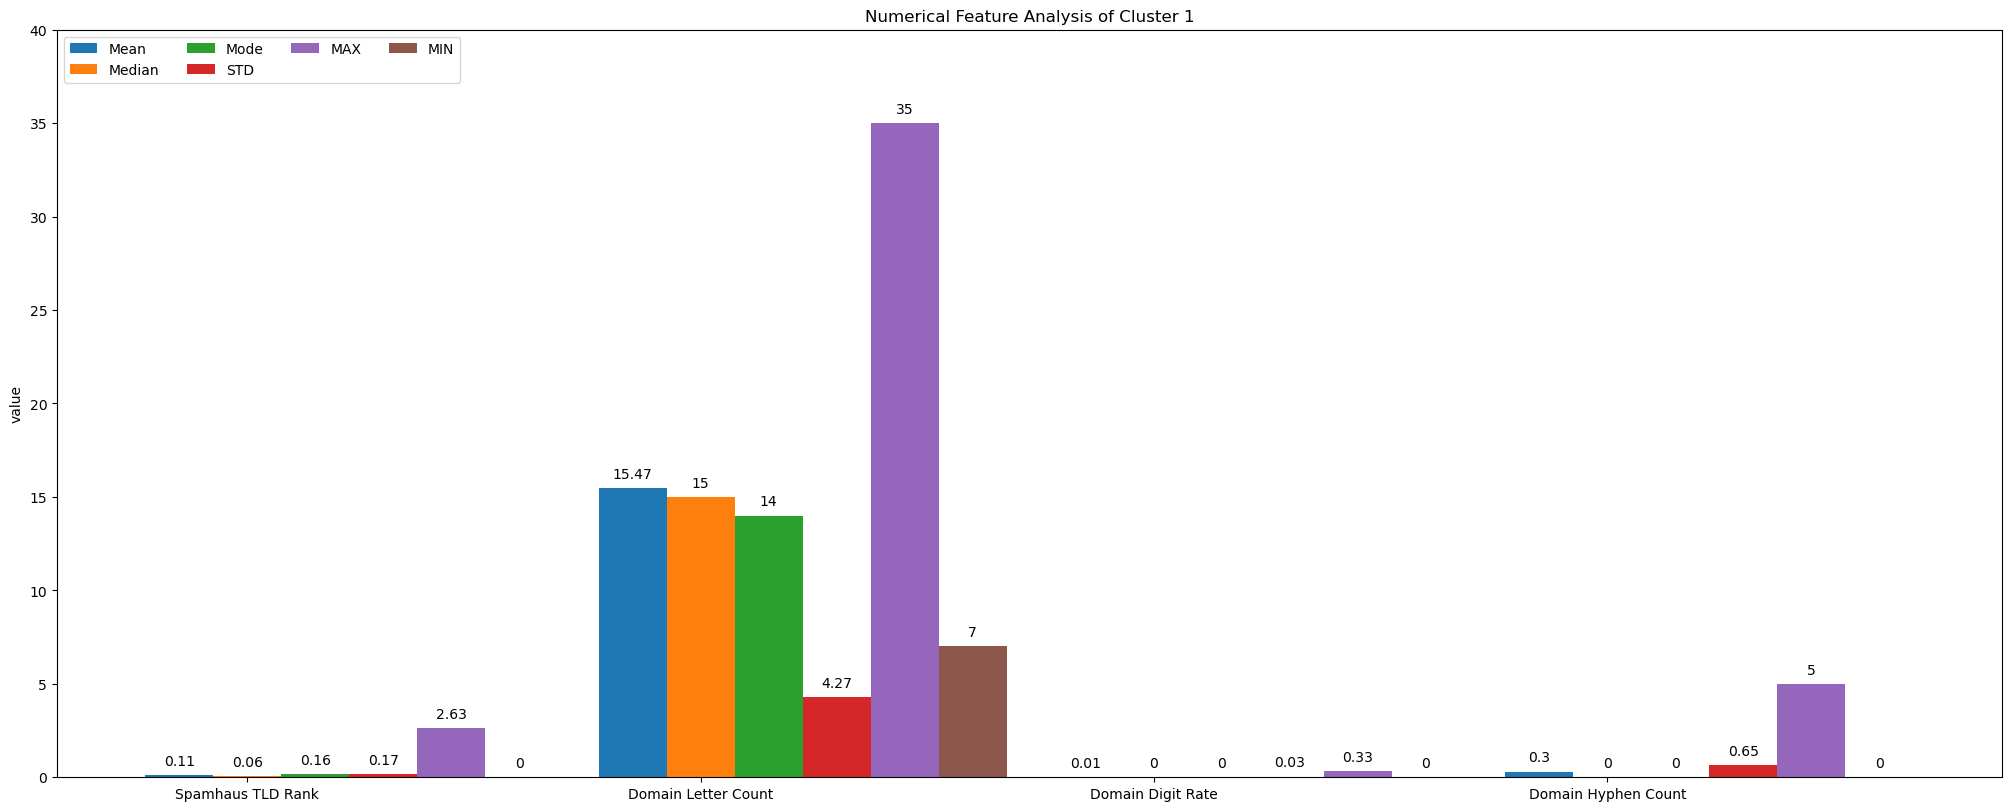

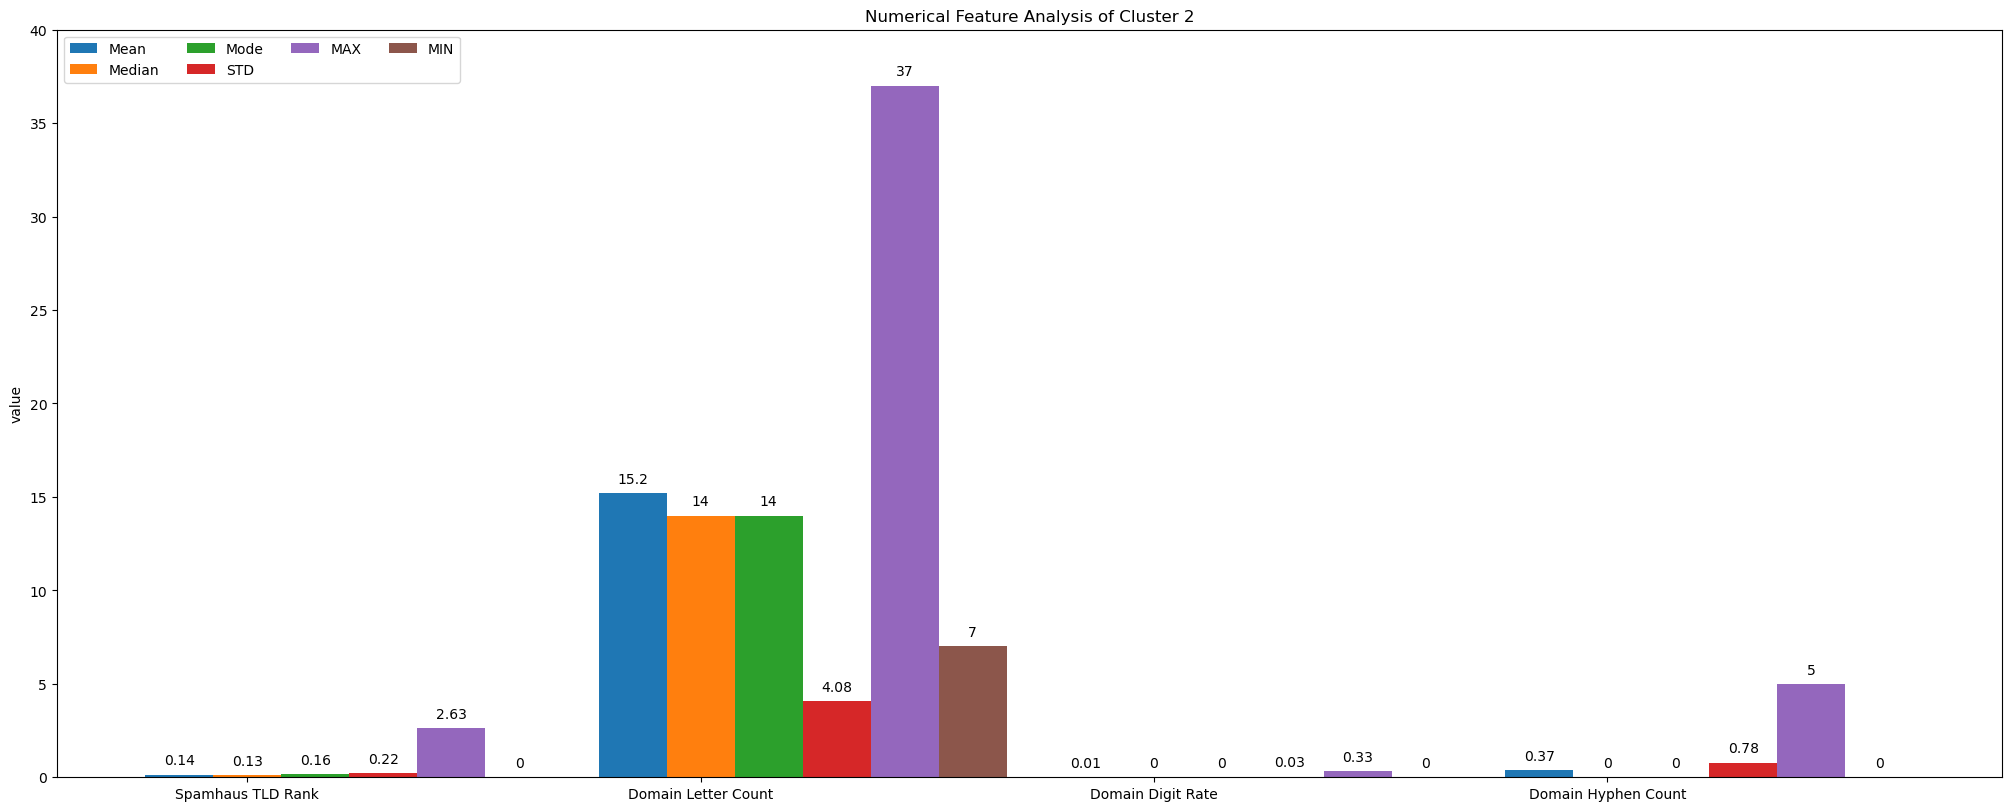

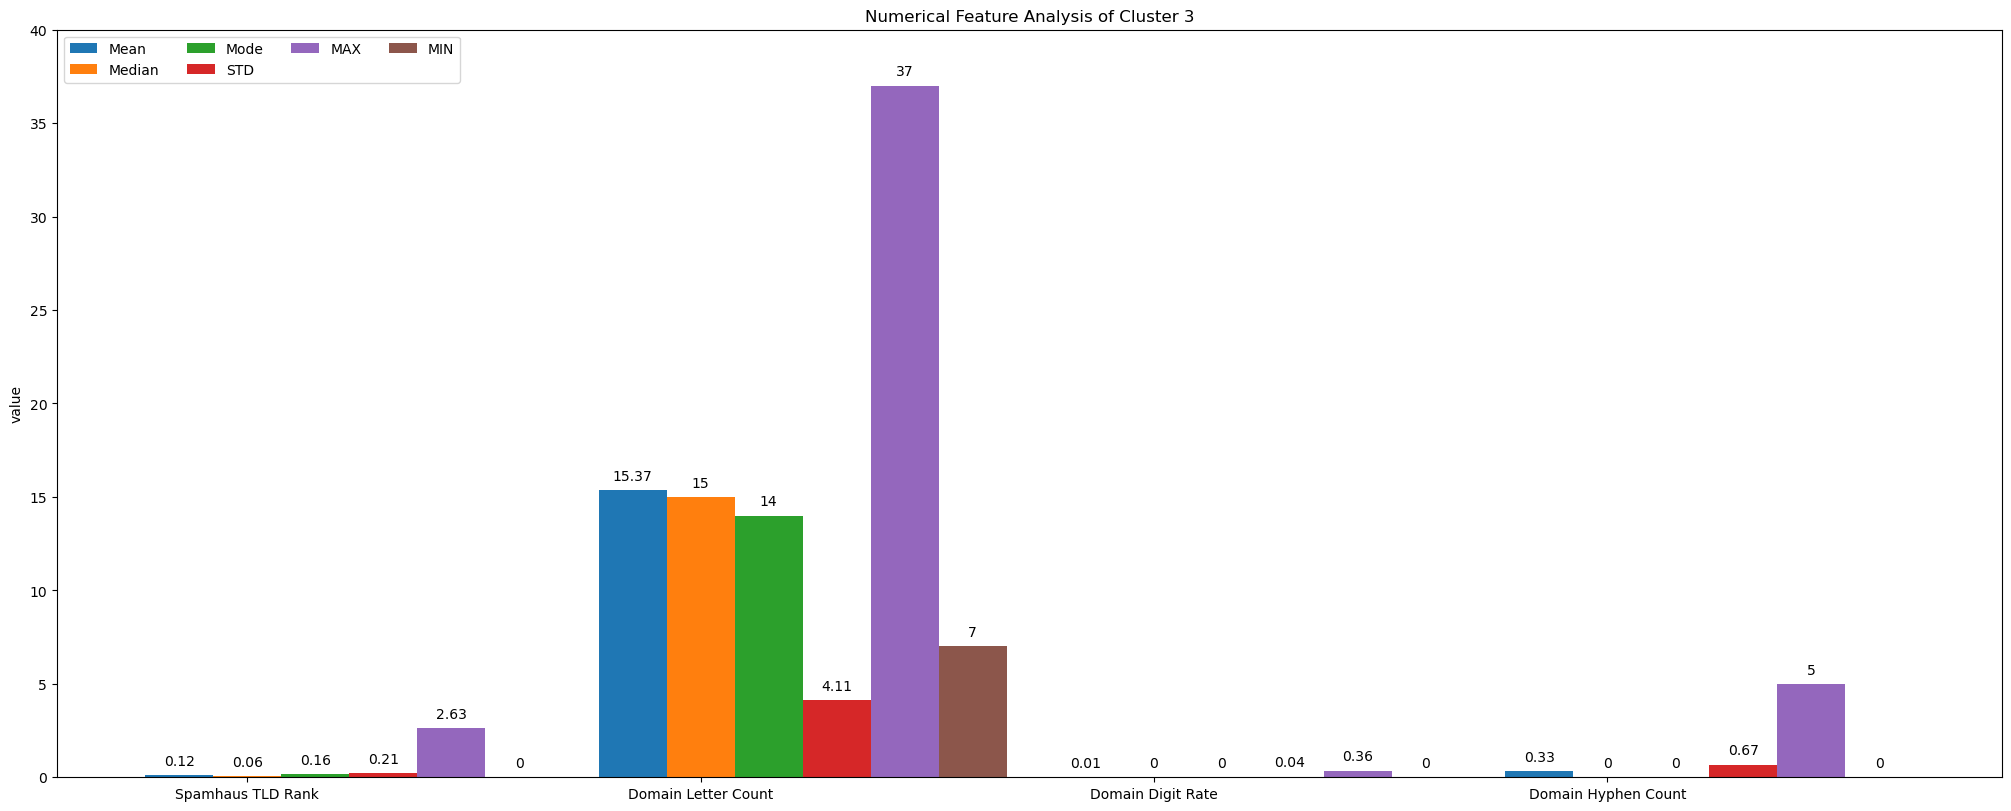

In [45]:
within_cluster_analysis_num_feature(cluster_1,'Cluster 1')
within_cluster_analysis_num_feature(cluster_2,'Cluster 2')
within_cluster_analysis_num_feature(cluster_3,'Cluster 3')

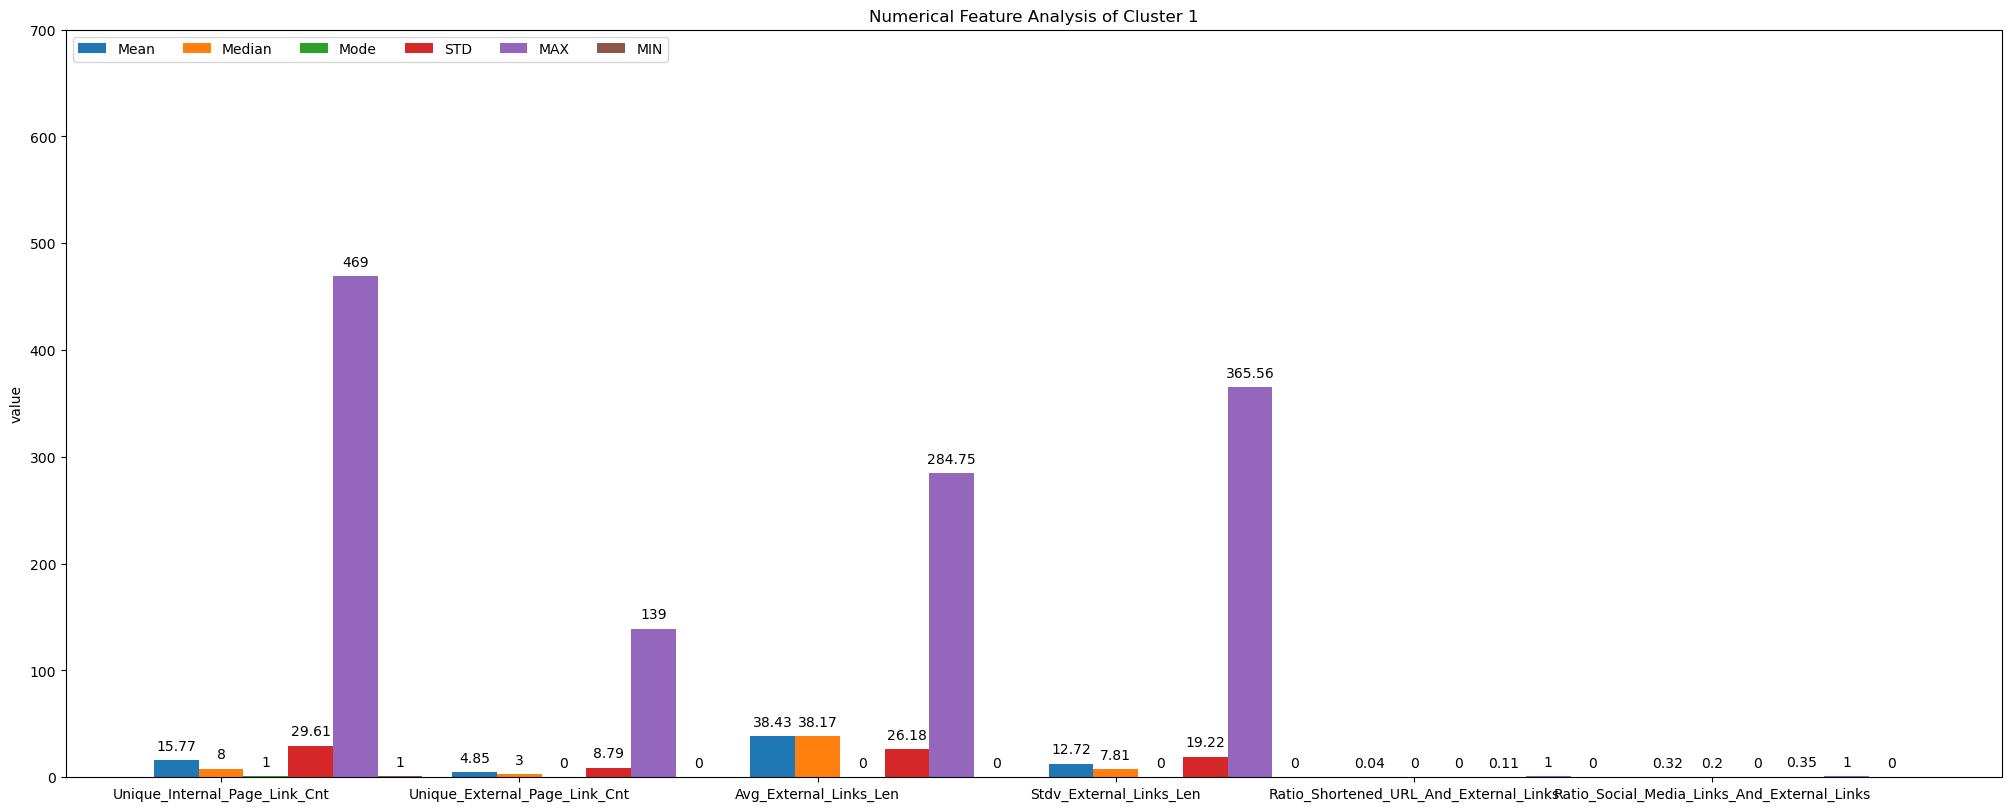

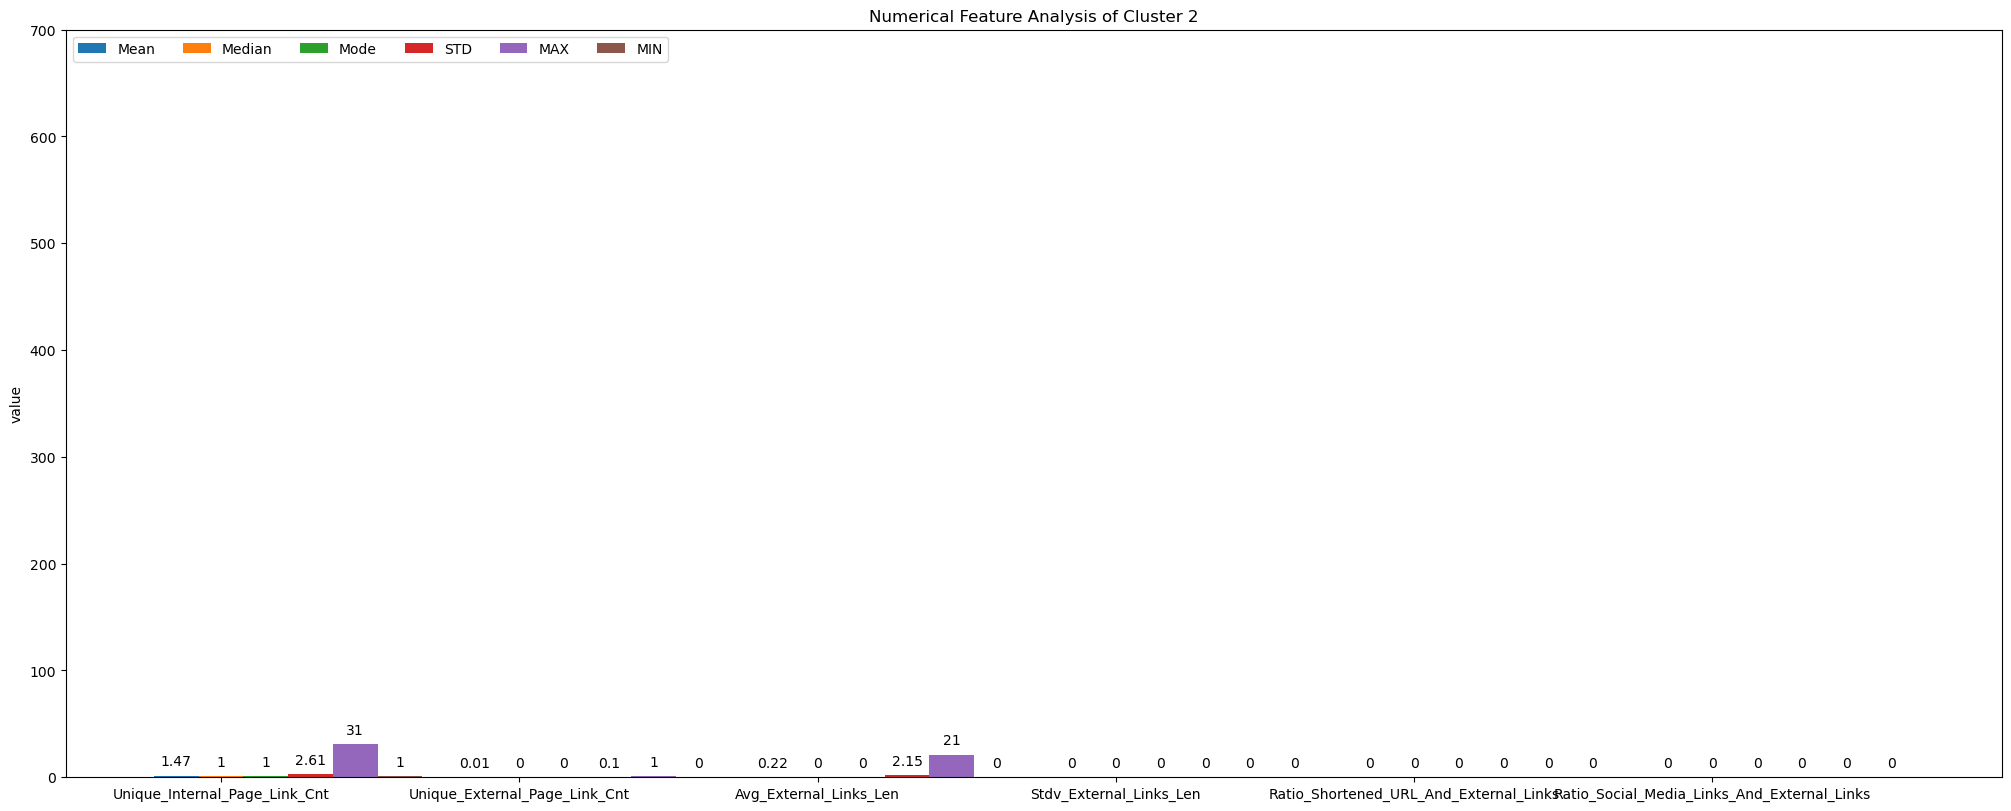

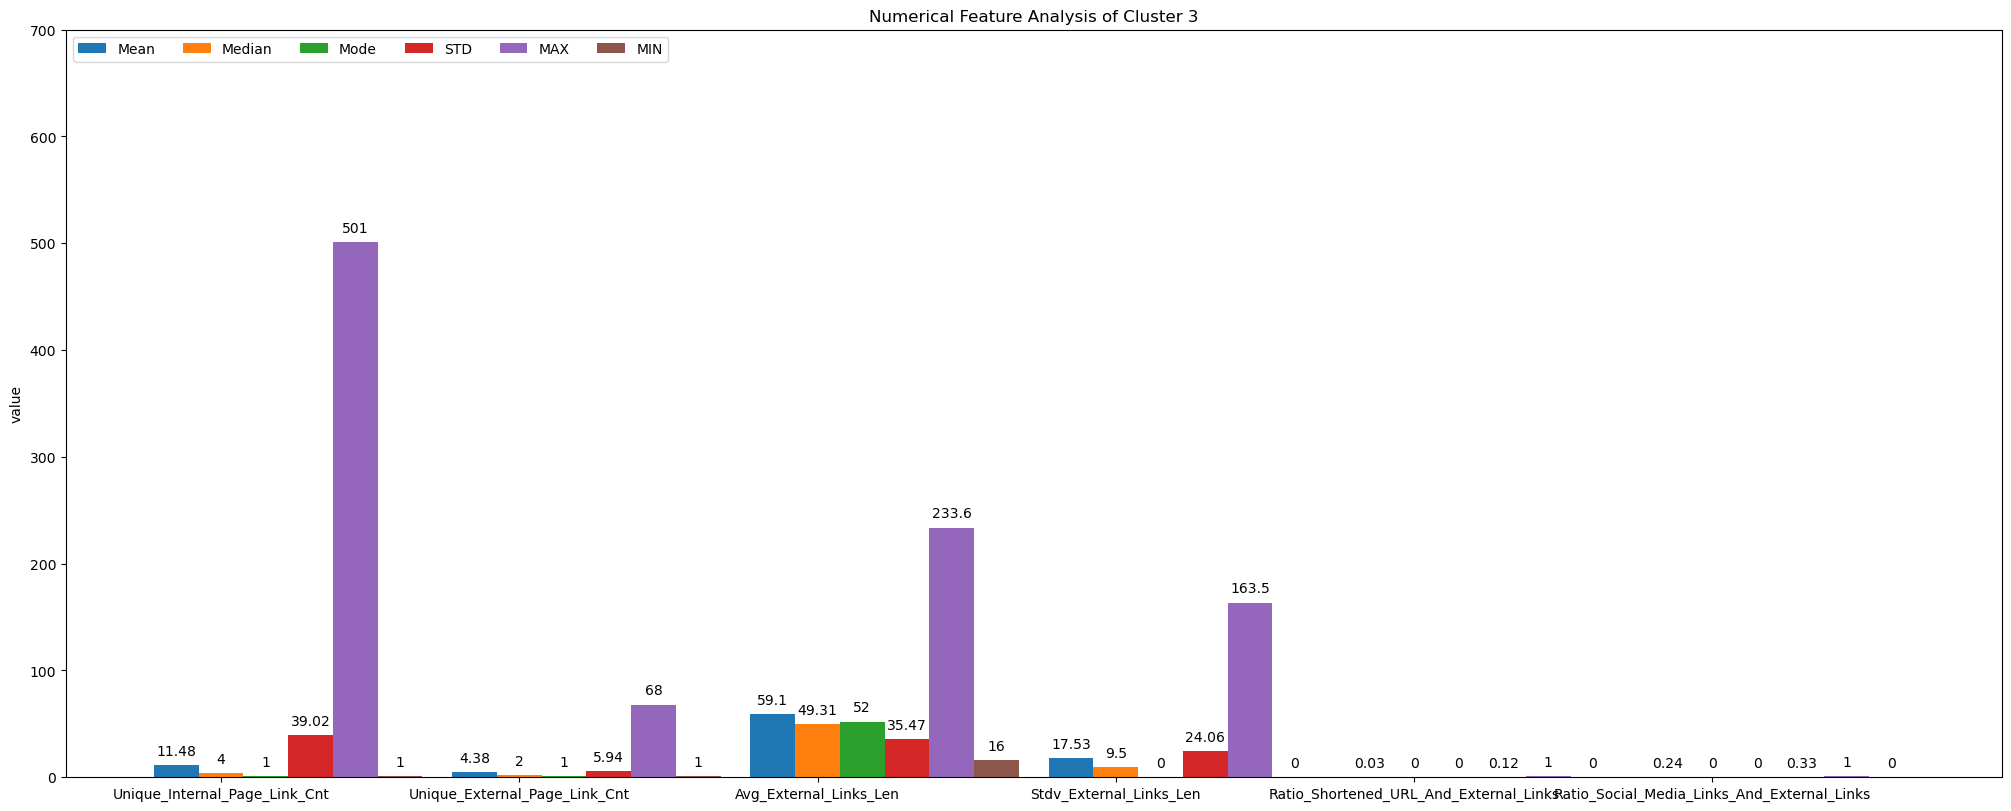

In [46]:
within_cluster_analysis_num_content_feature(cluster_1,'Cluster 1')
within_cluster_analysis_num_content_feature(cluster_2,'Cluster 2')
within_cluster_analysis_num_content_feature(cluster_3,'Cluster 3')

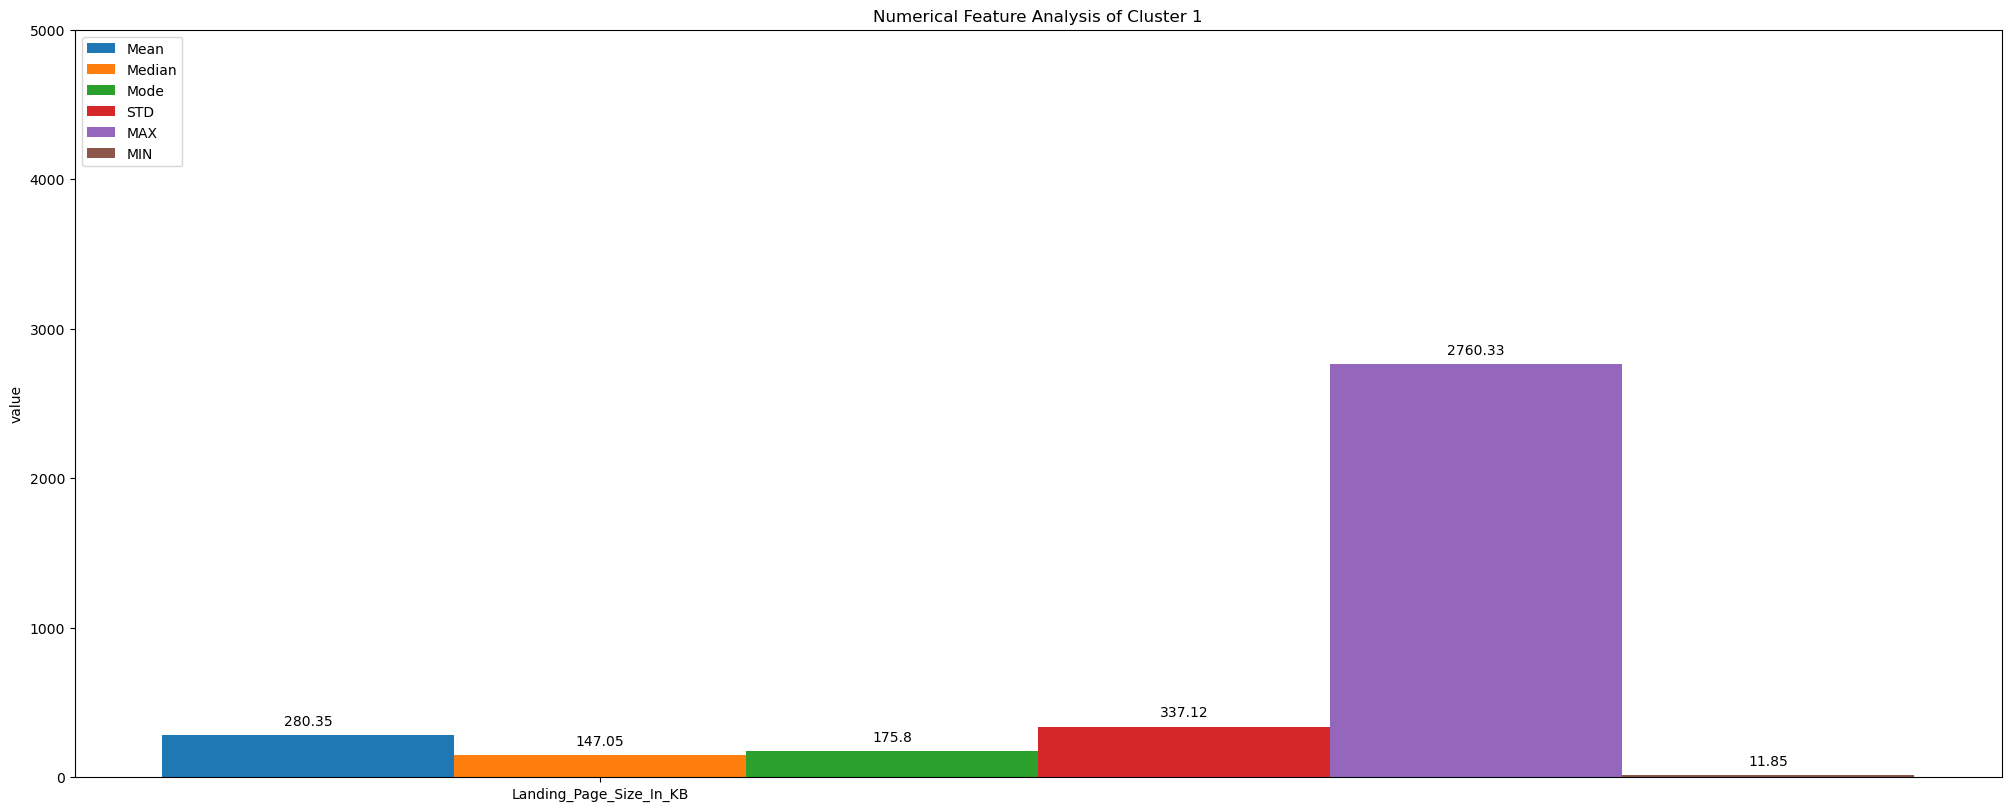

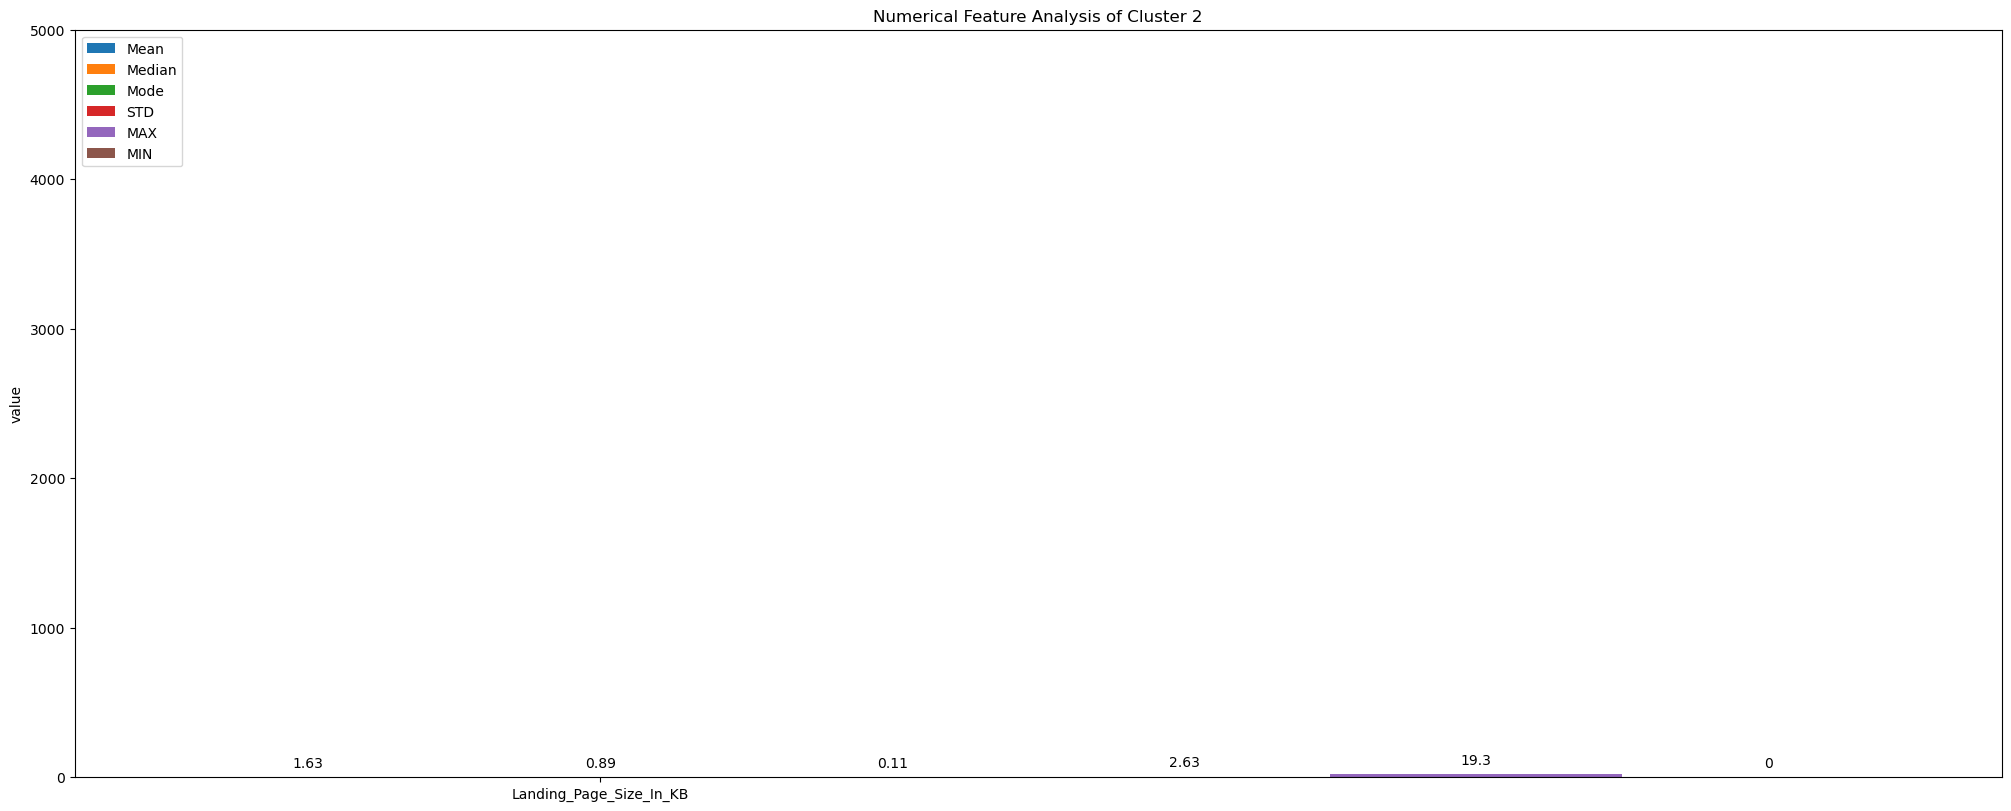

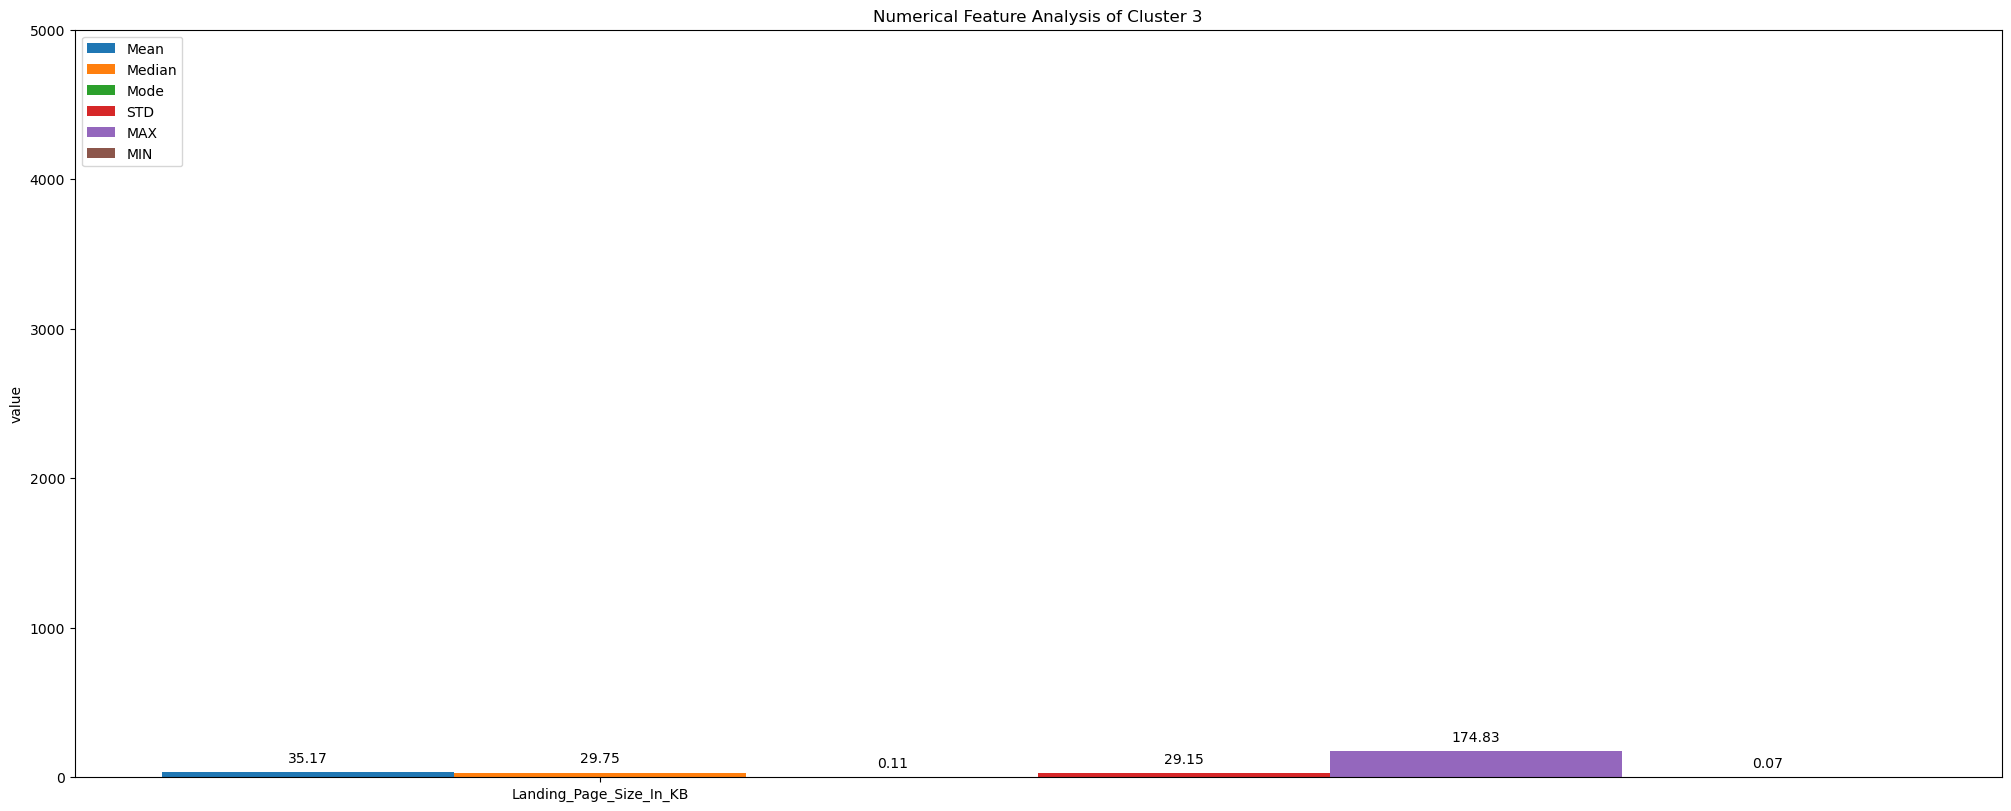

In [47]:
within_cluster_analysis_num_content2_feature(cluster_1,'Cluster 1')
within_cluster_analysis_num_content2_feature(cluster_2,'Cluster 2')
within_cluster_analysis_num_content2_feature(cluster_3,'Cluster 3')